In [20]:
from pyforest import *

# Default Rate Data

In [12]:
dRate = pd.read_csv(r'/Users/dillorr/Documents/school/NU/MSDS/ANA699A/project/peps300.csv', encoding = "ISO-8859-1")

<IPython.core.display.Javascript object>

In [83]:
# data preprocessing for readability and uniformity
dRate.columns = dRate.columns.str.replace("\n", "")
dRate.columns = dRate.columns.str.replace(" ", "")
dRate.head()

,OPEID,Name,Address,City,State,StateDesc,ZipCode,ZipExt,ProgLength,SchoolType,...,Year2,Num2,Denom2,DRate2,PRate2,Year3,Num3,Denom3,DRate3,PRate3
0,1002,ALABAMA AGRICULTURAL & MECHANICAL UNIVERSITY ...,4900 MERIDIAN STREET ...,NORMAL,AL,ALABAMA ...,35762,1357,8,1,...,2015,378.0,1902.0,19.8,A,2014,332.0,1753.0,18.9,A
1,1003,FAULKNER UNIVERSITY ...,5345 ATLANTA HIGHWAY ...,MONTGOMERY,AL,ALABAMA ...,36109,3398,8,2,...,2015,180.0,1471.0,12.2,A,2014,192.0,1470.0,13.0,A
2,1004,UNIVERSITY OF MONTEVALLO ...,PALMER CIRCLE ...,MONTEVALLO,AL,ALABAMA ...,35115,6000,8,1,...,2015,72.0,784.0,9.1,A,2014,64.0,793.0,8.0,A
3,1005,ALABAMA STATE UNIVERSITY ...,915 SOUTH JACKSON STREET ...,MONTGOMERY,AL,ALABAMA ...,36104,5714,8,1,...,2015,466.0,2208.0,21.1,P,2014,471.0,2419.0,19.4,P
4,1007,CENTRAL ALABAMA COMMUNITY COLLEGE ...,1675 CHEROKEE ROAD ...,ALEXANDER CITY,AL,ALABAMA ...,35010,0,5,1,...,2015,131.0,579.0,22.6,P,2014,184.0,674.0,27.2,P


### Default Rates for all Schools

In [77]:
# find min and max default values
dRate['DRate1'].describe()

count    4811.000000
mean        9.772584
std         7.486622
min         0.000000
25%         4.050000
50%         8.100000
75%        14.400000
max        66.600000
Name: DRate1, dtype: float64

In [14]:
dRate.columns

Index(['OPEID', 'Name', 'Address', 'City', 'State', 'StateDesc', 'ZipCode',
       'ZipExt', 'ProgLength', 'SchoolType', 'Year1', 'Num1', 'Denom1',
       'DRate1', 'PRate1', 'EthnicCode', 'CongDis', 'Region',
       'AverageorGreaterthan30', 'Year2', 'Num2', 'Denom2', 'DRate2', 'PRate2',
       'Year3', 'Num3', 'Denom3', 'DRate3', 'PRate3'],
      dtype='object')

In [124]:
# make copy of dataset for manipulation
dRateCopy = dRate.copy()

# replace numbered values for schoolType with strings.loc[(df.Event == 'Dance'),'Event']='Hip-Hop'
dRateCopy.loc[(dRateCopy.SchoolType == 1),'SchoolType']='Public'
dRateCopy.loc[(dRateCopy.SchoolType == 2),'SchoolType']='Private, Nonprofit'
dRateCopy.loc[(dRateCopy.SchoolType == 3),'SchoolType']='Proprietary'
dRateCopy.loc[(dRateCopy.SchoolType == 5),'SchoolType']='Foreign'
dRateCopy.loc[(dRateCopy.SchoolType == 6),'SchoolType']='Foreign'
dRateCopy.loc[(dRateCopy.SchoolType == 7),'SchoolType']='Foreign'

dRateCopy = dRateCopy[dRateCopy.SchoolType != 'Foreign']

In [125]:
# group by school type
dRateGrouped = dRateCopy.groupby('SchoolType')
dRatePublic = dRateGrouped.get_group('Public')
dRateNonprofit = dRateGrouped.get_group('Private, Nonprofit')
dRateProprietary = dRateGrouped.get_group('Proprietary')

### Default Rates for Public Schools

In [126]:
# find min and max default values
dRatePublic['DRate1'].describe()

count    1583.000000
mean       11.880543
std         6.282601
min         0.000000
25%         6.900000
50%        11.700000
75%        16.200000
max        43.800000
Name: DRate1, dtype: float64

### Default Rates for Private, Nonprofit Schools

In [127]:
dRateNonprofit['DRate1'].describe()

count    1510.000000
mean        6.347152
std         5.869980
min         0.000000
25%         2.400000
50%         4.800000
75%         8.200000
max        50.000000
Name: DRate1, dtype: float64

### Default Rates for Proprietary Schools

In [128]:
dRateProprietary['DRate1'].describe()

count    1386.000000
mean       12.412626
std         8.424456
min         0.000000
25%         6.400000
50%        11.100000
75%        16.900000
max        66.600000
Name: DRate1, dtype: float64

## Visualizations

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

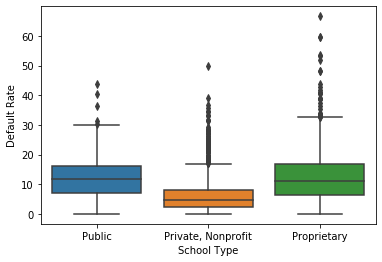

In [130]:
# Box Plot of Default Rates by School Type
bx1 = sns.boxplot(x='SchoolType', y='DRate1', data=dRateCopy)
bx1.set(xlabel = 'School Type', ylabel = 'Default Rate')
plt.show()

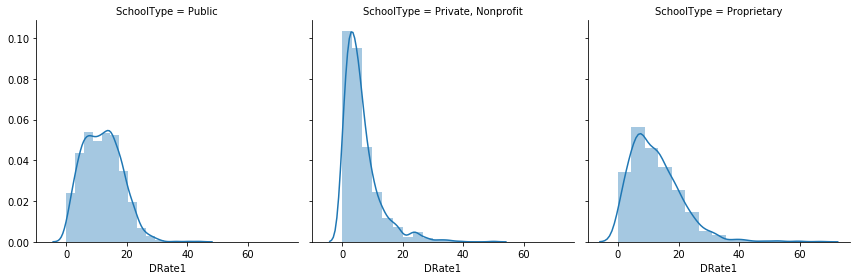

In [132]:
dRateDistsFacet = sns.FacetGrid(dRateCopy, col="SchoolType", height=4, aspect=1)
dRateDistsFacet = dRateDistsFacet.map(sns.distplot, "DRate1", bins=bins)

Census Data

AL-MO

In [6]:
censusALMO = pd.read_csv(r'/Users/dillorr/defaultRate/data/census2010/stco-mr2010_al_mo.csv', encoding = "ISO-8859-1")

<IPython.core.display.Javascript object>

In [7]:
censusALMO.columns

Index(['SUMLEV', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME', 'SEX', 'ORIGIN',
       'AGEGRP', 'IMPRACE', 'RESPOP'],
      dtype='object')

MT-WY

In [5]:
censusMTWY = pd.read_csv(r'/Users/dillorr/defaultRate/data/census2010/stco-mr2010_mt_wy.csv', encoding = "ISO-8859-1")

<IPython.core.display.Javascript object>

In [8]:
censusMTWY.columns

Index(['SUMLEV', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME', 'SEX', 'ORIGIN',
       'AGEGRP', 'IMPRACE', 'RESPOP'],
      dtype='object')

Join Census Datasets

In [ ]:
censusCombined = pd.concat([censusALMO, censusMTWY], axis=0)

Export to CSV

In [ ]:
# censusCombined.to_csv('/Users/dillorr/defaultRate/data/census2010/censusCombined.csv', index=False)